In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# give path to the data.csv 
file_path = '/content/drive/My Drive/data.csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [ ]:
df = pd.read_csv(file_path)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [ ]:
thresh = 0.6
df['y_pred_rf'] = (df.y_pred_random_forest >= 0.6).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= 0.6).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,0
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,0
3,1,0.506616,0.443674,0,0
4,0,0.418302,0.369532,0,0


In [ ]:
df.shape

(15758, 5)

Complete below function to compute true positive (tp), tn, fn, fp

In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  x=list(map(int,y_act))
  y=list(map(int,y_pred))
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(x)):
    if x[i]==1 and y[i]==1:
      tp=tp+1
    elif x[i]==1 and y[i]==0:
      fn=fn+1
    elif x[i]==0 and y[i]==0:
      tn=tn+1
    elif x[i]==0 and y[i]==1:
      fp=fp+1
  return tp, tn, fp, fn

In [ ]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 2406
TN for Logistic Reg : 6858
FP for Logistic Reg : 1021
FN for Logistic Reg : 5473


In [ ]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 2239
TN for Random Forest : 7417
FP for Random Forest : 462
FN for Random Forest : 5640


Let's verify result from sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [ ]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 2239
TN for Random Forest : 7417
FP for Random Forest : 462
FN for Random Forest : 5640


In a similar way complete all the functions below

In [ ]:
def compute_accuracy(tp, tn, fn, fp):
  acc= (tn/(tn+fp) + tp/(tp+fn))*100/2
  return acc

In [ ]:
print('Accuracy for Logistic Regression :', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 58.789186444980324
Accuracy for Random Forest : 61.276811778144435


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Logistic Regression :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 58.789186444980324
Accuracy for Logistic Regression : 61.276811778144435


In [ ]:
def compute_precision(tp,fp):
  precision= tp*100/(tp+fp)
  return precision

In [ ]:
print('Precision for Logistic Regression :', compute_precision(tp_lr,fp_lr))
print('Precision for Random Forest :', compute_precision(tp_rf,fp_rf))

Precision for Logistic Regression : 70.20717829004961
Precision for Random Forest : 82.8952239911144


In [ ]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 70.20717829004961
Precision for Random Forest : 82.89522399111439


In [ ]:
def compute_recall(tp,fn):
  recall=tp*100/(tp+fn)
  return recall

In [ ]:
print('Recall for Logistic Regression :', compute_recall(tp_lr,fn_lr))
print('Recall for Random Forest :', compute_recall(tp_rf,fn_rf))

Recall for Logistic Regression : 30.536870161187966
Recall for Random Forest : 28.417311841604263


In [ ]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 30.536870161187966
Recall for Random Forest : 28.417311841604263


In [ ]:
def compute_f1_score(y_true, y_pred):
  tp,tn,fp,fn=compute_tp_tn_fn_fp(y_true,y_pred)
  prec=compute_precision(tp,fp)/100
  reca=compute_recall(tp,fn)/100
  f1_score= 2*prec*reca/(prec+reca)
  return f1_score

In [ ]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))

F1 score for Logistic Regression : 0.42561471784892974
F1 score for Random Forest : 0.4232514177693762


In [ ]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.42561471784892974
F1 score for Random Forest : 0.42325141776937614


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
auc_lr= roc_auc_score(df.y_act, df.y_pred_logistic)
fpr_lr , tpr_lr, _ = roc_curve(df.y_act, df.y_pred_logistic)
auc_rf= roc_auc_score(df.y_act, df.y_pred_random_forest)
fpr_rf , tpr_rf, _ = roc_curve(df.y_act, df.y_pred_random_forest)

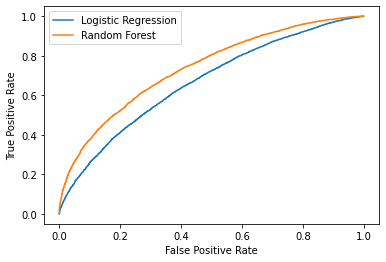

AUC for Random Forest model:  0.73829514083596
AUC for Logistics Regression model:  0.6657435203840882


In [ ]:
pyplot.plot(fpr_lr,tpr_lr, linestyle='-',label='Logistic Regression')
pyplot.plot(fpr_rf,tpr_rf, linestyle='-',label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print("AUC for Random Forest model: ",auc_rf)
print("AUC for Logistics Regression model: ",auc_lr)
